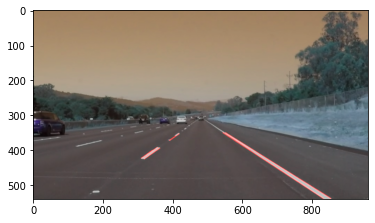

In [33]:
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import sys
%matplotlib inline

# importing the image
image = cv2.imread('CarND-LaneLines-P1-master/test_images/solidYellowLeft.mp4')
image_copy = image.copy()

# grayscale the image
grayscale_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

## apply gaussian blur
kernel_size = 5
gaussian_blur = cv2.GaussianBlur(grayscale_image, (kernel_size, kernel_size), 0)

# apply canny
minThreshold = 100
maxThreshold = 200
canny_img = cv2.Canny(gaussian_blur, minThreshold, maxThreshold)

def region_of_interest(img, vertices):
    
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with 
    #depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
  
#apply mask
lowerLeftPoint = [130, 540]
upperLeftPoint = [410, 350]
upperRightPoint = [570, 350]
lowerRightPoint = [915, 540]

pts = np.array([[lowerLeftPoint, upperLeftPoint, upperRightPoint, 
lowerRightPoint]], dtype=np.int32)
masked_image = region_of_interest(canny_img, pts)


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
              minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    
    draw_lines(line_img, lines)
    return line_img

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    This function draws `lines` with `color` and `thickness`.    
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
#hough lines
rho = 1
theta = np.pi/180
threshold = 30
min_line_len = 20 
max_line_gap = 20

image_copy = image.copy()
houged = hough_lines(masked_image, rho, theta, 
                  threshold, min_line_len, max_line_gap)
img_copy = cv2.addWeighted(image_copy, 0.8,houged, 1, 0)
plt.imshow(img_copy)

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import sys
%matplotlib inline



video = cv2.VideoCapture('CarND-LaneLines-P1-master/test_videos/solidWhiteRight.mp4')
while(video.isOpened()):
    _,image = video.read()
    image_copy = image.copy()

    # grayscale the image
    grayscale_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    ## apply gaussian blur
    kernel_size = 5
    gaussian_blur = cv2.GaussianBlur(grayscale_image, (kernel_size, kernel_size), 0)

    # apply canny
    minThreshold = 100
    maxThreshold = 200
    canny_img = cv2.Canny(gaussian_blur, minThreshold, maxThreshold)

    def region_of_interest(img, vertices):

        #defining a blank mask to start with
        mask = np.zeros_like(img)   

        #defining a 3 channel or 1 channel color to fill the mask with 
        #depending on the input image
        if len(img.shape) > 2:
            channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
            ignore_mask_color = (255,) * channel_count
        else:
            ignore_mask_color = 255

        #filling pixels inside the polygon defined by "vertices" with the fill color    
        cv2.fillPoly(mask, vertices, ignore_mask_color)

        #returning the image only where mask pixels are nonzero
        masked_image = cv2.bitwise_and(img, mask)
        return masked_image

    #apply mask
    lowerLeftPoint = [130, 540]
    upperLeftPoint = [410, 350]
    upperRightPoint = [570, 350]
    lowerRightPoint = [915, 540]

    pts = np.array([[lowerLeftPoint, upperLeftPoint, upperRightPoint, 
    lowerRightPoint]], dtype=np.int32)
    masked_image = region_of_interest(canny_img, pts)


    def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
        """
        `img` should be the output of a Canny transform.

        Returns an image with hough lines drawn.
        """
        lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                  minLineLength=min_line_len, maxLineGap=max_line_gap)
        line_img = np.zeros((*img.shape, 3), dtype=np.uint8)

        draw_lines(line_img, lines)
        return line_img

    def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
        """
        This function draws `lines` with `color` and `thickness`.    
        """
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    #hough lines
    rho = 1
    theta = np.pi/180
    threshold = 30
    min_line_len = 20 
    max_line_gap = 20

    image_copy = image.copy()
    houged = hough_lines(masked_image, rho, theta, 
                      threshold, min_line_len, max_line_gap)
    img_copy = cv2.addWeighted(image_copy, 0.8,houged, 1, 0)
    #plt.imshow(img_copy)
    
    cv2.imshow('test',img_copy)
    key = cv2.waitKey(20)
    if key == ord('q'):
        break


    

#plt.figure(figsize=(10,10))

video.release()
cv2.destroyAllWindows()

#plt.figure(figsize=(10,10))

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
import numpy as np
import cv2
import sys
import os.path
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0,15.0)
objectnessThreshold = 0.5 # Objectness threshold
matplotlib.rcParams['image.cmap'] = 'gray'


# Initialize the parameters
confThreshold = 0.1       # Confidence threshold
nmsThreshold = 0.4        # Non-maximum suppression threshold
inpWidth = 416            # Width of network's input image
inpHeight = 416           # Height of network's input image